In [1]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import time
from qutip import *
from numpy import sin, cos, sqrt, array, linspace

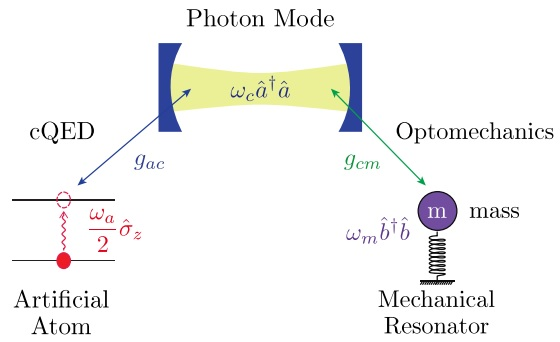

In [4]:
Image(filename='C:/Users/Ahmad/Desktop/2020/photo source/shem2.jpg',width=500, height=400)

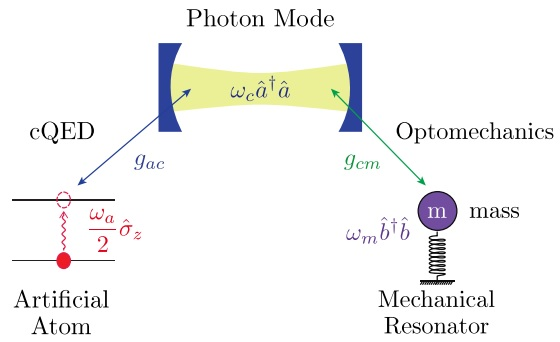

### Hamiltonian For this fully coupled syestem:

$\Large \hat{H}_{0}=\omega_{c}\hat{a}^\dagger \hat{a}+ \frac{\omega_{a}}{2}\hat{\sigma}_{z}+\omega_m \hat{b}^\dagger \hat{b} \\
\Large \;\;\;\;\;\;\;\;\;\;\; ig_{ac}(\hat{\sigma}_{+}\hat{a}-\hat{\sigma}_{-}\hat{a}^\dagger) -
 g_{cm}\hat{a}^\dagger \hat{a}(\hat{b}+\hat{b}^\dagger) $
 

### Coherent optical deriving and dissipation
Dynamics of the open system following Lindblad master equation

$\frac{d\hat{\rho}}{dt}= -i[\hat{H}_{0}+\hat{V}_{p}(t), \hat{\rho}] \\
  \;\;\;\;\;\;\; +\gamma_{c}L[\hat{a}]\hat{\rho}+\gamma_{a}L[\hat{\sigma}_{-}]\hat{\rho} \\
  \;\;\;\;\;\;\; +n_{th}\gamma_{m}L[\hat{b}^\dagger]
  +(n_{th}+1)\gamma_{m} L[\hat{b}]\hat{\rho}$

Which $\gamma_{m}$,$\gamma_{c}$ and $\gamma_{a}$ are the mechanical, cavity, and atomic
loss rates. $n_{th}$ is the thermal mean phonon occupancy. 

$\hat{V}_{p}(t)$ is coherent optical derive with frequency $\omega_{p}$ and amplitude $F_p$

$\hat{V}_{p}(t)= iF_p (\hat{a}^\dagger e^{i\omega_p t}-\hat{a} e^{-i\omega_p t})$

in order to remove t-dependence of H, we move to the rotating frame via unitary transformation...
Eventually, this is a H:

$ \hat{H}_{0}=\Delta_{cp}\hat{a}^\dagger \hat{a}+ \Delta_{ap}\hat{\sigma}_{z}+\omega_m \hat{b}^\dagger \hat{b} \\
 \;\;\;\;\;\;\; +ig_{ac}(\hat{\sigma}_{+}\hat{a}-\hat{\sigma}_{-}\hat{a}^\dagger) -
 g_{cm}\hat{a}^\dagger \hat{a}(\hat{b}+\hat{b}^\dagger) \\
\;\;\;\;\;\;\; + iF_p (\hat{a}^\dagger -\hat{a} ) $


## Photon number
Time evolution of photon and phonon Fig. 4 

In [ ]:
# parameter values
wm = 1.0                   #  mechanical frequency
wc = 100 * wm                  # cavity frequency.... 
wa = wc                      # resonance case

gamma_m = wm * 1e-6            # mechanical loss
gamma_a = wc * 1e-6
gamma_c = gamma_a

g_ac = wm/2.0               # atom-cavity coupling strength
g_cm = 0.001 * wm               # cavity-resonator coupling
g_am = 0.0               # atom-resonator coupling

F_p = gamma_c * 100.0    # laser amplitude

delta_ac = wa - wc        # atom-cavity detuning 
omega_p = wc/2.0 + g_ac       # eigenenergies for atom-cavity subsystem
omega_m = wc/2.0 -  g_ac      # for case which n=1
#omega_m = wc/2.0 -  g_ac
wp = omega_m * 1.01 # - wm             # laser frequency

delta_cp = wc - wp        # cavity-driving detuning
delta_ap = (wa - wp) # * 0.5        # atom-driving detuning   or wa/2 ?
delta_mp = wm - wp             # ??

gamma_eff = 18 * gamma_m   # the number of phonons steadily decreases with an effective dissipation const

omega_m
wp

delta_mp

In [ ]:
print('g_ac/wm=', g_ac/wm )
print("gamma_a/wm=", gamma_a/wm )
print("g_cm/wm=", g_cm/wm )
print("Q_m=", wm/gamma_m,"Q_c=",wc/gamma_c, "Q_a=", wa/gamma_a )
print("F_p/gamma_a=",F_p/gamma_c)
print("ommega_m=", omega_m,"wp=", wp, "wc=", wc,"wm=", wm)
print('wc/wm=',wc/wm)
print("delta_ac=", delta_ac,"delta_cp=", delta_cp,"delta_ap=", delta_ap)

In [ ]:
Nc = 6     # cavity photon number
Nm = 6    # mechanical phonon number 

a = tensor(qeye(2), qeye(Nm),destroy(Nc))     # cavity anihilation operator
b = tensor(qeye(2), destroy(Nm),qeye(Nc))      # phonon anihilation opr

sigma_z = tensor(sigmaz(), qeye(Nm), qeye(Nc))
sigma_p = tensor(sigmap(), qeye(Nm), qeye(Nc))  # raising and lowering ops for atom
sigma_m = tensor(sigmam(), qeye(Nm), qeye(Nc))
    
collapse = []
n_th= 0 # 3.45               # thermal mean phonon occupancy

rate = gamma_c
if rate > 0.0: 
    collapse.append(a * sqrt(rate))
rate = gamma_a
if rate > 0.0 : 
    collapse.append(sigma_m * sqrt(rate))
rate = n_th * gamma_m
if rate > 0.0: 
    collapse.append(b.dag() * sqrt(rate))
rate = (n_th+1) * gamma_m
if rate > 0.0 : 
    collapse.append(b * sqrt(rate))

expct_ops = []
expct_ops.append(a.dag()*a)
expct_ops.append(b.dag()*b)

bdagb = []
g20 = []            # to calculate autocorelation b.dag*b

# defining H as a function of atom-phonon coupling --->> g_am
#g_amlist = np.linspace(0.25,0.75,30) * g_cm         # g_am range 
    
H = delta_cp * a.dag() * a + 0.5*delta_ap *sigma_z  + delta_mp * b.dag() * b \
+ 1j * g_ac * (sigma_p * a - sigma_m * a.dag()) - g_cm * a.dag() * a *(b.dag() + b) \
+ 1j* F_p *(a.dag()-a)
    
#rho_ss = steadystate(H, collapse)           # final state for steady state
#bdagb.append(expect(b.dag()* b, rho_ss))    # calculate expectation of b.dag*b for steady state 

#g20.append(expect(b.dag()* b.dag()* b * b, rho_ss)/expect (b.dag()*b,rho_ss)**2)
#(collapse[3])

In [ ]:
psi0 = tensor(basis(2,0),basis(Nm,2),basis(Nc,0));
times = np.linspace(0.0, 200,1000)   # 3/gamma_eff
opt=Options(nsteps=10000)
output = mesolve(H, psi0, times,collapse,expct_ops,options=opt)

In [ ]:
fig, ax= plt.subplots(1,2,figsize=(10,8))
ax[0].plot(times,output.expect[1],'b')
ax[1].plot(times ,output.expect[0],'r')

steady state
$\langle b^\dagger b \rangle$


In [ ]:
wc-wm

In [ ]:
bdagb = []
g20 = []            # to calculate autocorelation b.dag*b

# defining H as a function of atom-phonon coupling --->> g_am
# range wc-wm<wp<wc+wp
wp_list = np.linspace(99,101,100)              # laser frequency range      (99,101,100) 

for wp in wp_list:
    
    H = (wc - wp) * a.dag() * a + 0.5*(wa-wp) *sigma_z + (wm-wp) * b.dag() * b \
    + 1j * g_ac * (sigma_p * a - sigma_m * a.dag()) - g_cm * a.dag() * a *(b.dag() + b) \
    + 1j* F_p *(a.dag()-a)
    
    rho_ss = steadystate(H, collapse)           # final state for steady state
    bdagb.append(expect(b.dag()* b, rho_ss))    # calculate expectation of b.dag*b for steady state 
    #g20.append(expect(b.dag()* b.dag()* b * b, rho_ss)/expect (b.dag()*b,rho_ss)**2)
    # calculate g^(2)(0)

In [ ]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,6))
#ax1.plot((wp_list-wc)/wm ,np.real(g20))
ax2.plot((wp_list-wc)/wm ,np.real(bdagb))


In [ ]:
# same parameter except that set higher for Nc and Nm 
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,6))
ax2.plot((wp_list-wc)/wm ,np.real(bdagb))
ax1.plot((wp_list-wc)/wm ,np.real(g20))
ax2.set_ylabel(r'$\langle b^\dagger b \rangle$',fontsize=16)
ax1.set_ylabel(r'$G_2$',fontsize=16)

In [ ]:
plt.savefig('C:/Users/Ahmad/Desktop/2020/photo source/G2.png')